In [1]:
%load_ext autoreload
import numpy as np
%aimport FE
%aimport common_meshes
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import triangle
%matplotlib inline
print(plt.style.available)
plt.style.use('seaborn-paper')

def cum_dist(xs, eigvals):
    # track current index
    i = 0
    curr_eig = eigvals[0]
    ys = []
    N = 0
    for x in xs:
        while curr_eig < x and i+1 < len(eigvals):
            N+=1
            i+=1
            curr_eig = eigvals[i]
        ys.append(N)
    return ys
def plotMesh(mesh):
    triang = tri.Triangulation(mesh['vertices'][:,0], mesh['vertices'][:,1], mesh['triangles'])
    plt.axes().set_aspect('equal')
    plt.triplot(triang)
    return
    

['dark_background', 'seaborn-paper', 'seaborn-ticks', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-white', 'bmh', 'ggplot', 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-poster', 'seaborn-muted', 'fivethirtyeight', 'seaborn-notebook', 'seaborn-dark', 'seaborn-colorblind', 'grayscale', 'seaborn-deep', 'seaborn-talk', 'seaborn-whitegrid', 'classic']


In [2]:
def generate_quadrilateral():
    ths = np.random.random(4)*(np.pi/2.)+np.array([0., np.pi/2., np.pi, 3*np.pi/2.])
    rs = np.array([np.random.random(4)*5.0 + 0.5]*2)
    return (rs*np.array([np.cos(ths), np.sin(ths)]))

In [3]:
def generate_pentagon():
    q = generate_quadrilateral()
    return np.concatenate((np.array([[1.], [0.]]), q), axis=1)

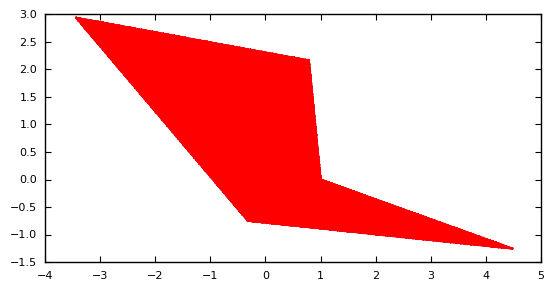

In [4]:
def random_mesh(nsides=5, area=0.001):
    if nsides==5:
        sklt = {'vertices': generate_pentagon().T,
                'triangles': np.array([[0,1,2], [0,2,3], [0,3,4]])}
    elif nsides==4:
        sklt = {'vertices': generate_quadrilateral().T,
                'triangles': np.array([[0,1,2], [0,2,3]])}
    m = triangle.triangulate(sklt, "ra"+str(area))
    return sklt, m
s, m = random_mesh(5)
plotMesh(s)
plotMesh(m)
def area(skltn):
    area = 0
    for t in skltn['triangles']:
        v1 = skltn['vertices'][t[0]]
        v2 = skltn['vertices'][t[1]]
        v3 = skltn['vertices'][t[2]]
        d1 = v3 - v1
        d2 = v3 - v2
        area += 0.5*np.sqrt(np.cross(d1, d2).dot(np.cross(d1, d2)))
    return area

In [5]:
rect_skltn = {'vertices': np.array([[0, 0], [1, 0], [1, 4], [-1, 2]]),
              'triangles': np.array([[0, 1, 2], [0, 2, 3]])}
print(area(rect_skltn))

5.0


In [6]:
def findRandomEigs(num_to_find=50, num_sides=4, A=0.01):
    dat = []
    for j in range(10):
        sklt, mesh = random_mesh(num_sides, area=A)
        eigs = FE.findEigs(mesh, n=num_to_find)[0]
        dat.append((sklt, mesh, area(sklt), eigs))
    return dat

In [7]:
dat = findRandomEigs(num_sides=5, num_to_find=100, A=0.001)

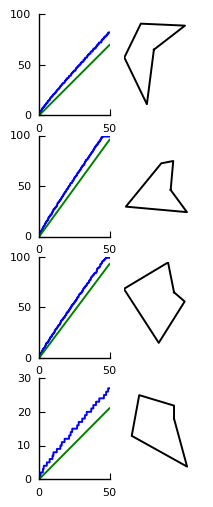

In [8]:
N = 4
fig, axarr = plt.subplots(N, 2)#, sharex='col')
for i in range(min(len(dat), N)):
    data = dat[i]
    sklt = data[0]
    A = data[2]
    eigs = data[3]
    max_eig = np.max(eigs)
    xs = np.arange(0, 50, 0.1)# max_eig, 0.1)
    weyl = 4*np.pi*(np.arange(len(eigs))/A)
    ax0 = axarr[i,0]
    ax1 = axarr[i,1]
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.axis('off')
    V = sklt['vertices'].take(range(6), axis=0, mode='wrap')
    ax1.plot(V[:,0], V[:,1], color='k')
    ax1.set_aspect('equal')
    ys = cum_dist(xs, eigs)
    weyl_func = (A/(4.*np.pi))*xs
    #ax0.set_aspect('equal')
    ax0.plot(xs, ys)
    ax0.plot(xs, weyl_func)
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.xaxis.tick_bottom()
    ax0.yaxis.tick_left()
    ax0.locator_params(axis='x', nbins='2')
    ax0.locator_params(axis='y', nbins='3')
fig.set_size_inches(2, 6)
#fig.tight_layout()
fig.savefig("/home/neal/Dropbox/Documents/Dissertation/figures/random_pentagons2.pdf", extension="pdf")

{'triangles': array([[0, 1, 2],
       [0, 2, 3],
       [0, 3, 4]]), 'vertices': array([[ 1.        ,  0.        ],
       [ 1.1979902 ,  2.74694647],
       [-1.72080915,  4.43945155],
       [-0.52457443, -0.20465178],
       [ 0.54046799, -1.75149188]])}


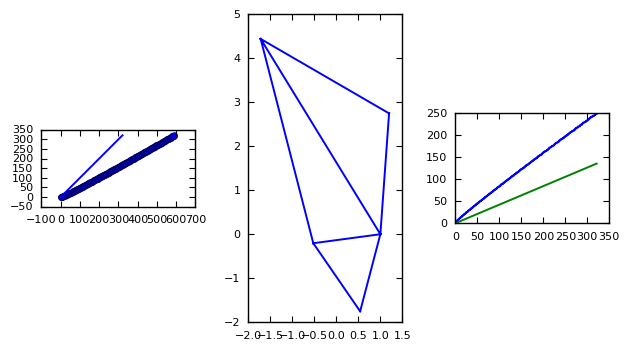

In [9]:
sklt = dat[9][0]
print( sklt)
mesh = triangle.triangulate(sklt, "ra0.0005")
eigs = FE.findEigs(mesh, n=250)[0]
max_eig = np.max(eigs)
xs = np.arange(0, max_eig, 0.1)
weyl = 4*np.pi*(np.arange(len(eigs))/A)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_aspect('equal')
ax1.plot(xs, xs)
ax1.scatter(weyl, eigs)
triang = tri.Triangulation(sklt['vertices'][:,0], sklt['vertices'][:,1], sklt['triangles'])
ax2.set_aspect('equal')
ax2.triplot(triang)
ys = cum_dist(xs, eigs)
weyl_func = (A/(4.*np.pi))*xs
ax3.set_aspect('equal')
ax3.plot(xs, ys)
ax3.plot(xs, weyl_func)
fig.tight_layout()
plt.show()

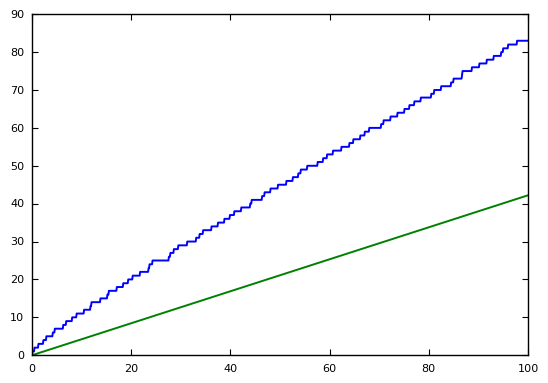

In [10]:
plt.plot(xs[:1000], ys[:1000])
plt.plot(xs[:1000], weyl_func[:1000])
plt.show()

In [11]:
def generate(num_pts=100, inner_radius=0.):
    vts = [[np.cos(2*np.pi*k/num_pts), np.sin(2*np.pi*k/num_pts)] for k in range(num_pts)]
    segs = [[i,i+1] for i in range(num_pts-1)]
    segs.append([num_pts-1, 0])
    holes = []
    if inner_radius > 0:
        vts = vts + [[inner_radius*np.cos(2*np.pi*k/num_pts + np.pi/num_pts),
                      inner_radius*np.sin(2*np.pi*k/num_pts + np.pi/num_pts)]
                   for k in range(num_pts)]
        segs = segs + [[i, i+1] for i in range(num_pts, 2*num_pts-1)]
        segs.append([2*num_pts-1, num_pts])
        holes.append([0.,0.])
    if inner_radius > 0:
        return {'vertices': np.array(vts),
                'segments': np.array(segs),
                'holes': np.array(holes)}
    else:
        return {'vertices': np.array(vts),
                'segments': np.array(segs)}


5.3045131153
3.141592653589793


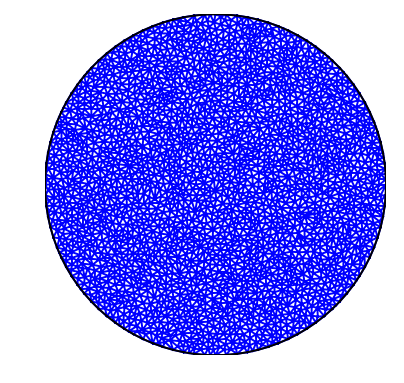

In [12]:
num_pts = 100
inner_radius=0
s = generate(num_pts=num_pts, inner_radius=inner_radius)
t = triangle.triangulate(s, 'pqa0.001')

#A = area(t)
print(A)
print(np.pi - np.pi*inner_radius**2)

fig, ax1 = plt.subplots()

triang = tri.Triangulation(t['vertices'][:,0], t['vertices'][:,1], t['triangles'])
ax1.triplot(triang)

for seg in s['segments']:
    pt0 = s['vertices'][seg[0]]
    pt1 = s['vertices'][seg[1]]
    ax1.plot([pt0[0], pt1[0]], [pt0[1], pt1[1]], color='k')
    
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.axis('off')
ax1.set_aspect('equal')
plt.show()

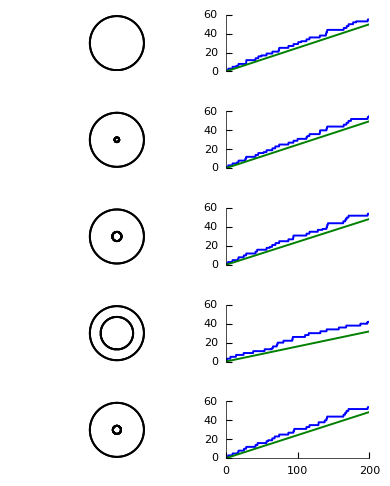

In [33]:
N = 5
fig, axarr = plt.subplots(N, 2, sharey='col')
fig.set_size_inches(4, 5)
for k in range(N):
    if k == 0:
        inner_radius = 0.
    else:
        inner_radius = 0.8*np.random.random()
    s = generate(inner_radius=inner_radius)
    mesh = triangle.triangulate(s, 'pqa0.001')
    A = np.pi*(1. - inner_radius**2)
    eigs = FE.findEigs(mesh, n=75)[0]
    ax1 = axarr[k, 0]
    
    for seg in s['segments']:
        pt0 = s['vertices'][seg[0]]
        pt1 = s['vertices'][seg[1]]
        ax1.plot([pt0[0], pt1[0]], [pt0[1], pt1[1]], color='k')

    ax1.set_xlim((-1.05, 1.05))
    ax1.set_ylim((-1.05, 1.05))
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.axis('off')
    ax1.set_aspect('equal')
    
    xs = np.arange(0., 200, 0.1)#np.max(eigs), 0.1)
    y1s = cum_dist(xs, eigs)
    y2s = A*xs/(4*np.pi)
    ax2 = axarr[k, 1]
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_linewidth(0.5)
    ax2.spines['bottom'].set_linewidth(0.5)
    if k < N-1:
        ax2.set_xticks([])
        ax2.spines['bottom'].set_visible(False)
    else:
        ax2.xaxis.tick_bottom()
    ax2.yaxis.tick_left()
    ax2.locator_params(axis='x', nbins='3')
    ax2.locator_params(axis='y', nbins='3')
    ax2.plot(xs, y1s)
    ax2.plot(xs, y2s)
fig.tight_layout()
fig.savefig("/home/neal/Dropbox/Documents/Dissertation/figures/random_annuli.pdf", extension="pdf")
plt.show()

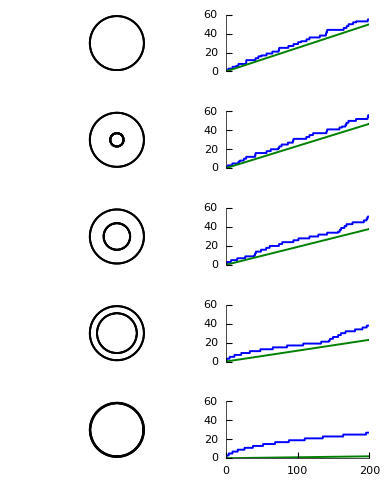

In [32]:
N = 5
fig, axarr = plt.subplots(N, 2, sharey='col')
fig.set_size_inches(4, 5)
for k in range(N):
    if k == 0:
        inner_radius = 0.
    else:
        inner_radius = 6*k/24.5
    s = generate(inner_radius=inner_radius)
    mesh = triangle.triangulate(s, 'pqa0.001')
    A = np.pi*(1. - inner_radius**2)
    eigs = FE.findEigs(mesh, n=75)[0]
    ax1 = axarr[k, 0]
    
    for seg in s['segments']:
        pt0 = s['vertices'][seg[0]]
        pt1 = s['vertices'][seg[1]]
        ax1.plot([pt0[0], pt1[0]], [pt0[1], pt1[1]], color='k')

    ax1.set_xlim((-1.05, 1.05))
    ax1.set_ylim((-1.05, 1.05))
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.axis('off')
    ax1.set_aspect('equal')
    
    xs = np.arange(0., 200, 0.1)#np.max(eigs), 0.1)
    y1s = cum_dist(xs, eigs)
    y2s = A*xs/(4*np.pi)
    ax2 = axarr[k, 1]
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_linewidth(0.5)
    ax2.spines['bottom'].set_linewidth(0.5)
    if k < N-1:
        ax2.set_xticks([])
        ax2.spines['bottom'].set_visible(False)
    else:
        ax2.xaxis.tick_bottom()
    ax2.yaxis.tick_left()
    ax2.locator_params(axis='x', nbins='3')
    ax2.locator_params(axis='y', nbins='3')
    ax2.plot(xs, y1s)
    ax2.plot(xs, y2s)
fig.tight_layout()
fig.savefig("/home/neal/Dropbox/Documents/Dissertation/figures/random_annuli.pdf", extension="pdf")
plt.show()